In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('wdbc.data')
df

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

In [13]:
df = df.drop(['842302'], axis=1)

In [14]:
target = df['M']
features = df.drop(['M'], axis=1)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm

In [16]:
# allocate variables to store the sums of metrics
sacc1 = 0
sacc2 = 0
sp = 0
sr = 0

# define decision tree
SVM1 = svm.SVC(kernel='linear',C=1e6)

# repeat train-test-split + regression for 20 times
for i in range(0,20):
    x_train, x_test, y_train, y_test = train_test_split(features, 
                                                        target, 
                                                        test_size=0.3,
                                                        stratify=target
                                                        )
    SVM1 = SVM1.fit(x_train, y_train)
    train_pred = SVM1.predict(x_train)
    test_pred = SVM1.predict(x_test)
    CM1_train = confusion_matrix(y_train, train_pred)
    CM1_test = confusion_matrix(y_test, test_pred)
    
    # metrics calcultations based on confusion matrix
    train_accuracy1 = (CM1_train[0,0]+CM1_train[1,1])/(sum(sum(CM1_train)))
    test_accuracy1 = (CM1_test[0,0]+CM1_test[1,1])/(sum(sum(CM1_test)))
    precision1 = CM1_test[0,0]/(CM1_test[0,0]+CM1_test[1,0])
    recall1 = CM1_test[0,0]/(CM1_test[0,0]+CM1_test[0,1])
    
    # store the results
    sacc1 += train_accuracy1
    sacc2 +=test_accuracy1
    sp += precision1
    sr += recall1

# calculate mean metric values
train_accuracy1 = sacc1/20
test_accuracy1 = sacc2/20
precision1 = sp/20
recall1 = sr/20

# print results
print("Training Results of SVM1:")
print('TrainAcc', '\t', 'TestAcc', '\t', 'Precision', '\t', 'Recall')
print(round(train_accuracy1, 2), '\t\t', round(test_accuracy1, 2), '\t\t', round(precision1, 2), '\t\t', round(recall1, 2))

Training Results of SVM1:
TrainAcc 	 TestAcc 	 Precision 	 Recall
0.97 		 0.96 		 0.96 		 0.97


In [17]:
# allocate variables to store the sums of metrics
sacc1 = 0
sacc2 = 0
sp = 0
sr = 0

# define decision tree
SVM2 = svm.SVC(kernel='rbf',C=1e6)

# repeat train-test-split + regression for 20 times
for i in range(0,20):
    x_train, x_test, y_train, y_test = train_test_split(features, 
                                                        target, 
                                                        test_size=0.3,
                                                        stratify=target
                                                        )
    SVM2 = SVM2.fit(x_train, y_train)
    train_pred = SVM2.predict(x_train)
    test_pred = SVM2.predict(x_test)
    CM1_train = confusion_matrix(y_train, train_pred)
    CM1_test = confusion_matrix(y_test, test_pred)
    
    # metrics calcultations based on confusion matrix
    train_accuracy1 = (CM1_train[0,0]+CM1_train[1,1])/(sum(sum(CM1_train)))
    test_accuracy1 = (CM1_test[0,0]+CM1_test[1,1])/(sum(sum(CM1_test)))
    precision1 = CM1_test[0,0]/(CM1_test[0,0]+CM1_test[1,0])
    recall1 = CM1_test[0,0]/(CM1_test[0,0]+CM1_test[0,1])
    
    # store the results
    sacc1 += train_accuracy1
    sacc2 +=test_accuracy1
    sp += precision1
    sr += recall1

# calculate mean metric values
train_accuracy1 = sacc1/20
test_accuracy1 = sacc2/20
precision1 = sp/20
recall1 = sr/20

# print results
print("Training Results of SVM2:")
print('TrainAcc', '\t', 'TestAcc', '\t', 'Precision', '\t', 'Recall')
print(round(train_accuracy1, 2), '\t\t', round(test_accuracy1, 2), '\t\t', round(precision1, 2), '\t\t', round(recall1, 2))

Training Results of SVM2:
TrainAcc 	 TestAcc 	 Precision 	 Recall
0.98 		 0.95 		 0.95 		 0.96


In [18]:
# allocate lists to store parameters and metrics
c_ls = []
train_acc_ls = []
test_acc_ls = []
pre_ls = []
rc_ls = []

# model parameter tuning
for i in [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 1e5, 1e6]:
    c_ls.append(i)
    
    # allocate variables to store the sums of metrics
    sacc1 = 0
    sacc2 = 0
    sp = 0
    sr = 0
    
    # define decision tree
    SVM3 = SVC(kernel='linear', C=i )
    for j in range(0, 20):
        # split the dataset
        x_train, x_test, y_train, y_test = train_test_split(features, 
                                                            target, 
                                                            test_size=0.3,
                                                            stratify=target
                                                            )
        SVM3 = SVM3.fit(x_train, y_train)
        train_pred = SVM3.predict(x_train)
        test_pred = SVM3.predict(x_test)
        CM2_train = confusion_matrix(y_train, train_pred)
        CM2_test = confusion_matrix(y_test, test_pred)
        
        # calculate metrics
        train_accuracy2 = (CM2_train[0,0]+CM2_train[1,1])/sum(sum(CM2_train))
        test_accuracy2 = (CM2_test[0,0]+CM2_test[1,1])/sum(sum(CM2_test))
        precision2 = CM2_test[0,0]/(CM2_test[0,0]+CM2_test[1,0])
        recall2 = CM2_test[0,0]/(CM2_test[0,0]+CM2_test[0,1])
        
        # store the results
        sacc1 += train_accuracy2
        sacc2 +=test_accuracy2
        sp += precision2
        sr += recall2
        
    # calculate mean metric values
    train_accuracy2 = sacc1/20
    test_accuracy2 = sacc2/20
    precision2 = sp/20
    recall2 = sr/20

    # store the mean results
    train_acc_ls.append(round(train_accuracy2, 2))
    test_acc_ls.append(round(test_accuracy2, 2))
    pre_ls.append(round(precision2, 2))
    rc_ls.append(round(recall2, 2))

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
# join the results
result = {'c':c_ls, 'train_accuracy':train_acc_ls, 'test_accuracy':test_acc_ls, 'precision':pre_ls, 'recall':rc_ls}
result = pd.DataFrame(result)
result.to_csv('SVM3_results.csv')
result

,c,train_accuracy,test_accuracy,precision,recall
0,0.001,0.95,0.94,0.94,0.97
1,0.010,0.96,0.94,0.95,0.97
2,0.100,0.96,0.95,0.95,0.97
3,1.000,0.97,0.95,0.95,0.98
4,10.000,0.97,0.96,0.96,0.97
5,100.000,0.97,0.96,0.97,0.98
6,1000.000,0.97,0.95,0.96,0.96
7,100000.000,0.97,0.95,0.95,0.96
8,1000000.000,0.97,0.95,0.96,0.96


Text(27.125, 0.5, 'Recall')

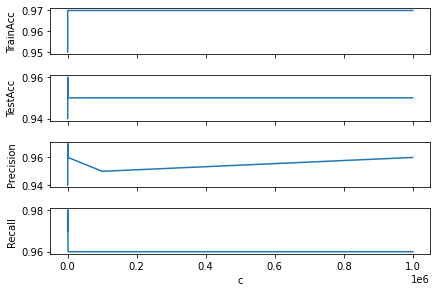

In [21]:
# data visualization
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.tight_layout()

# accuracy
plt.subplot(4,1,1)
sns.lineplot(data=result, x='c', y='train_accuracy')
plt.ylabel('TrainAcc')

plt.subplot(4,1,2)
sns.lineplot(data=result, x='c', y='test_accuracy')
plt.ylabel('TestAcc')

# precision
plt.subplot(4,1,3)
sns.lineplot(data=result, x='c', y='precision')
plt.ylabel('Precision')

# recall
plt.subplot(4,1,4)
sns.lineplot(data=result, x='c', y='recall')
plt.ylabel('Recall')

Text(0, 0.5, '')

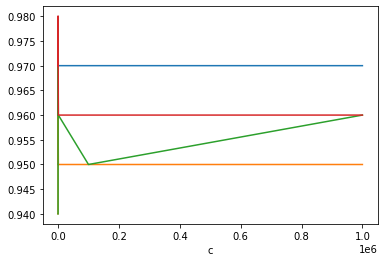

In [22]:
# overview
fig, ax = plt.subplots(1,1)
plt.subplot(111)
sns.lineplot(data=result, x='c', y='train_accuracy')
sns.lineplot(data=result, x='c', y='test_accuracy')
sns.lineplot(data=result, x='c', y='precision')
sns.lineplot(data=result, x='c', y='recall')
plt.ylabel(None)